In [154]:
import pandas as pd
def read_from_csv(data_name, header=0, names=None):
    if "tsv" in data_name:
        data = pd.read_csv(data_name,
                            sep='\t',
                            encoding = "utf-8",
                            engine = "python",
                            header = header,
                            names = names)
    elif "csv" in data_name:
        data = pd.read_csv(data_name,
                        encoding = "utf-8",
                        engine = "python",
                        header = header,
                        names = names)
    else:
        raise NotImplementedError("Given data file type is not supported yet.")
    return data

## Plot results

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.set_context("paper")
sns.color_palette()
rc = {
    'figure.figsize':(5,4),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'text.color': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'font.family':'Times New Roman',
      'font.size' : 16}
plt.rcParams.update(rc)

data_name_orig2display = {'twitter-hate-speech-tsa': 'Twitter-Hate-Speech', 
                            'civil-comments': 
                                # r'CC-5k-$\rho$=11.5', 
                                    'Civil-Comments',
                            'civil-comments-20k': r'CC-20k-$\rho$=11.5', 
                            'civil-comments-40k': r'CC-40k-$\rho$=11.5',
                            'civil-comments-5k-7p5': r'CC-5k-$\rho$=7.5',
                            'gibert-2018-shs': 'Gibert-2018', 
                            'us-election-2020': 'US-Election-2020', 
                            'cmsb-tsd': 'CMSB', 
                            'waseem-and-hovy-2016': 'Waseem-and-Hovy-2016',
                            'founta-2018-thas': 'Founta-2018', 
                            'davidson-thon': 'Davidson-2017', 
                            'ami': 'AMI-2018'}

In [156]:
df_all_mean_results = read_from_csv("mean_results.csv")
df_all_agg_results = read_from_csv("agg_results.csv")
def convert_str2number(x):
    if type(x) == str and x != "-":
        return ast.literal_eval(x)
    else:
        return x
for var in variant_cols[1:-1]:
    df_all_mean_results[var] = df_all_mean_results[var].apply(lambda x: convert_str2number(x))

In [165]:
df_all_mean_results.variant.unique()

array(['augmentation_abusive_lexicon', 'augmentation_bert',
       'augmentation_external_data_preprocessing', 'baseline', 'fl',
       'sampling_modifiedRS_oversampling',
       'sampling_modifiedRS_undersampling', 'sampling_weightedRS_combi',
       'th', 'wce', 'wfl'], dtype=object)

In [149]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [150]:
sns.color_palette()[1]

(0.8666666666666667, 0.5176470588235295, 0.3215686274509804)

In [151]:
sns.color_palette("YlOrBr", as_cmap=True).get_over()

array([0.4       , 0.14509804, 0.02352941, 1.        ])

## Std

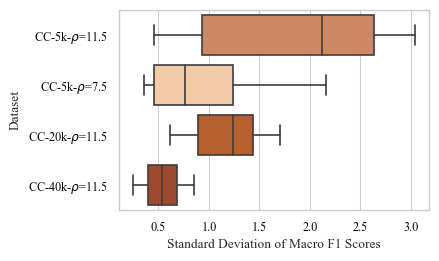

In [152]:
fig, ax = plt.subplots(figsize=(4,2.6))#figsize=(5,2.5)4.6
df_std = df_all_agg_results[["data_name", "test_f1_macro_std"]]
df_std = df_std.rename({"data_name":"Dataset", "test_f1_macro_std":"Standard Deviation of Macro F1 Scores"}, axis=1)
df_std["Dataset"] = df_std['Dataset'].map(data_name_orig2display)
data_order = [data_name_orig2display[data_name] for data_name in eval_data_names]
if cc:
    palette = {r'CC-5k-$\rho$=11.5': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
               r'CC-5k-$\rho$=7.5': [1.        , 0.8        , 0.6, 1.        ],
               r'CC-20k-$\rho$=11.5': [0.8       , 0.35, 0.1, 0.2        ],
               r'CC-40k-$\rho$=11.5':[0.7       , 0.25, 0.1, 0.2       ],
               } 
else:
    palette = sns.color_palette()
sns.boxplot(x="Standard Deviation of Macro F1 Scores", y="Dataset", data=df_std, order=data_order, palette=palette)
# ax.set_xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
ax.figure.savefig('cc_std_distribution.svg', dpi=600, bbox_inches="tight")

### Random Oversampling

#### Overfitting

In [22]:
# rho_name = "augmentation_rho"
# data_clear_overfitting = ["civil-comments", "davidson-thon"]
# which_data_to_check = (df_all_mean_results["variant"].isin(["baseline", "augmentation_external_data"])) & (df_all_mean_results["data_name"].isin(data_clear_overfitting))
# df_overfitting = df_all_mean_results[which_data_to_check][["data_name", rho_name, "train_f1_macro", "val_f1_macro", "test_f1_macro"]]
# def compute_deviation_to_baseline(row, split):
#     baseline_condition = (df_overfitting["data_name"] == row["data_name"]) & (df_overfitting[rho_name] == "-")
#     baseline_value = df_overfitting.loc[baseline_condition, f"{split}_f1_macro"].values[0]
#     return row[f"{split}_f1_macro"] - baseline_value
# for split in ["train", "val", "test"]:
#     df_overfitting[f"{split}_f1_macro_delta"] = df_overfitting.apply(lambda row: compute_deviation_to_baseline(row, split), axis=1)
# df_overfitting = df_overfitting[df_overfitting[rho_name] != "-"]
# df_overfitting = df_overfitting[[rho_name, "data_name", "train_f1_macro_delta", "val_f1_macro_delta", "test_f1_macro_delta"]]
# df_overfitting

,augmentation_rho,data_name,train_f1_macro_delta,val_f1_macro_delta,test_f1_macro_delta
137,1.0,civil-comments,1.18,0.02,1.05
138,2.0,civil-comments,1.09,1.31,0.45
139,3.0,civil-comments,0.92,0.39,0.54
140,5.0,civil-comments,0.27,0.86,-0.18
141,7.5,civil-comments,0.67,0.15,-0.83
632,1.0,davidson-thon,5.00,-1.28,-1.63
633,2.0,davidson-thon,4.69,-1.64,-2.07
634,3.0,davidson-thon,4.72,-1.03,-1.17
635,5.0,davidson-thon,2.84,0.26,-0.53
636,7.5,davidson-thon,2.49,-1.63,-1.31


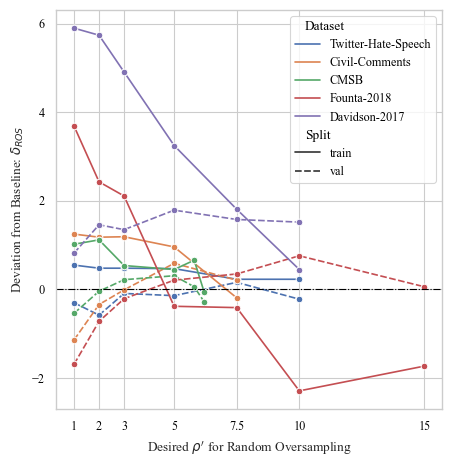

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
data_clear_overfitting = ["twitter-hate-speech-tsa", "civil-comments", "cmsb-tsd", "founta-2018-thas", "davidson-thon", ]
data_no_overfitting = ["gibert-2018-shs", "us-election-2020", "ami"]

# fig_name = "no_overfitting"
# data = data_no_overfitting
# rho_ticks = [1,2,3,5,7.5]

fig_name = "clear_overfitting"
data = data_clear_overfitting
rho_ticks = [1,2,3,5,7.5,10,15]

which_data_to_check = ((df_all_mean_results["variant"].isin(["baseline", "sampling_modifiedRS_oversampling"])) 
                        & (df_all_mean_results["data_name"].isin(data))
                        )
rho_name = "sampling_modifiedRS_rho"
splits = ["train", "val"]
df_overfitting = df_all_mean_results[which_data_to_check][["data_name", rho_name]+[f"{split}_f1_macro" for split in splits]]
def compute_deviation_to_baseline(row, split):
    baseline_condition = (df_overfitting["data_name"] == row["data_name"]) & (df_overfitting[rho_name] == "-")
    baseline_value = df_overfitting.loc[baseline_condition, f"{split}_f1_macro"].values[0]
    return row[f"{split}_f1_macro"] - baseline_value
for split in splits:
    df_overfitting[f"{split}_f1_macro_delta"] = df_overfitting.apply(lambda row: compute_deviation_to_baseline(row, split), axis=1)
df_overfitting = df_overfitting[df_overfitting[rho_name] != "-"]
df_overfitting = df_overfitting[["data_name", rho_name]+[f"{split}_f1_macro_delta" for split in splits]]

df_overfitting_expanded = pd.DataFrame(columns=[rho_name, "data_name", "split", "f1_delta"])
rhos_unique = df_overfitting[rho_name].unique().tolist()[:-1]
data_names_unique = df_overfitting.data_name.unique().tolist()
data_names_list = []
for data_name in data_names_unique:
    data_names_list += [data_name_orig2display[data_name]] * len(splits) * len(rhos_unique)
df_overfitting_expanded["data_name"] = data_names_list
rhos_list = []
for rho in rhos_unique:
    rhos_list += [rho] * len(splits)
df_overfitting_expanded[rho_name] = rhos_list * len(data_names_unique)
df_overfitting_expanded["split"] = splits * len(rhos_unique) * len(data_names_unique)
for data_name in data_names_unique:
    for split in splits:
        for rho in rhos_unique:
            where_to_assign = ((df_overfitting_expanded["data_name"] == data_name_orig2display[data_name]) 
                                & (df_overfitting_expanded["split"] == split)
                                & (df_overfitting_expanded[rho_name] == rho))
            value_from_where = ((df_overfitting["data_name"] == data_name)
                                & (df_overfitting[rho_name] == rho))
            if len(df_overfitting[value_from_where]) > 0:
                value = df_overfitting.loc[value_from_where, f"{split}_f1_macro_delta"].values[0]
                df_overfitting_expanded.loc[where_to_assign, "f1_delta"] = value
df_overfitting_expanded = df_overfitting_expanded.rename({"data_name":"Dataset", "split":"Split"}, axis=1)

fig, ax = plt.subplots(figsize=(4.8,4.95))
sns.lineplot(x=rho_name, y="f1_delta", data=df_overfitting_expanded, 
                hue="Dataset", style="Split", marker="o", ax=ax)#
ax.set_xticks(rho_ticks, labels=rho_ticks)
ax.set_xlabel(r"Desired $\rho^{\prime}$ for Random Oversampling")
# delta_ticks = [y for y in list(range(-2, 8, 2))]
# ax.set_yticks(delta_ticks)
ax.set_ylabel(r'Deviation from Baseline: $\delta_{ROS}$')
# '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
ax.axhline(y=0, linewidth=0.8, color="black", ls="-.")
ax.figure.tight_layout()
ax.figure.savefig(f'ROS_{fig_name}.svg', dpi=600, bbox_inches="tight")

In [159]:
data2color = {"Twitter-Hate-Speech": sns.color_palette()[0], 
                            "Civil-Comments": sns.color_palette()[1],
                            'Gibert-2018': sns.color_palette()[2],
                            'US-Election-2020': sns.color_palette()[3],
                            'CMSB': sns.color_palette()[4],
                            'Founta-2018': sns.color_palette()[5],
                            'Davidson-2017': sns.color_palette()[6],
                            'AMI-2018': sns.color_palette()[7],}

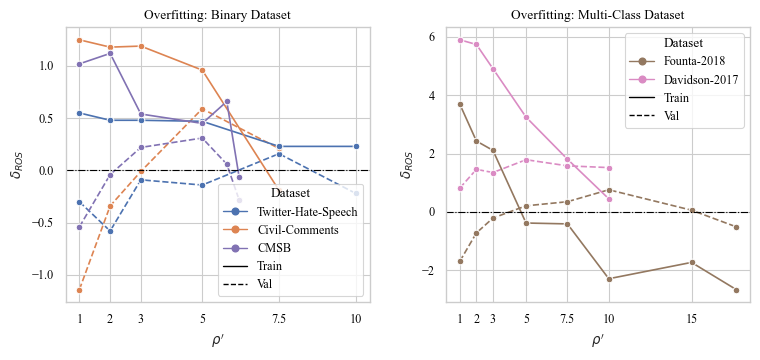

In [162]:
rho_name = "sampling_modifiedRS_rho"
splits = ["train", "val"]
data_clear_overfitting_binary = ["twitter-hate-speech-tsa", "civil-comments", "cmsb-tsd", ]
data_clear_overfitting_multi = ["founta-2018-thas", "davidson-thon", ]
which_data_to_check = ((df_all_mean_results["variant"] == "sampling_modifiedRS_oversampling")
                       & (df_all_mean_results["data_name"].isin(data_clear_overfitting_binary+data_clear_overfitting_multi)))
df_overfitting = df_all_mean_results[which_data_to_check][["data_name", rho_name]+[f"{split}_f1_macro" for split in splits]]
def compute_deviation_to_baseline(row, split):
    baseline_condition = (df_all_mean_results["data_name"] == row["data_name"]) & (df_all_mean_results["variant"] == "baseline")
    baseline_value = df_all_mean_results.loc[baseline_condition, f"{split}_f1_macro"].values[0]
    return row[f"{split}_f1_macro"] - baseline_value
for split in splits:
    df_overfitting[f"{split}_f1_macro_delta"] = df_overfitting.apply(lambda row: compute_deviation_to_baseline(row, split), axis=1)
df_overfitting = df_overfitting[["data_name", rho_name]+[f"{split}_f1_macro_delta" for split in splits]]

data2ifoverfitting = {data_name: "Overfitting:Binary Dataset" for data_name in data_clear_overfitting_binary}
data2ifoverfitting.update({data_name: "Overfitting: Multi-Class Dataset" for data_name in data_clear_overfitting_multi})
df_overfitting["IfOverfitting"] = df_overfitting["data_name"].map(data2ifoverfitting)
df_overfitting["data_name"] = df_overfitting['data_name'].map(data_name_orig2display)
df_overfitting = df_overfitting.rename({"data_name":"Dataset"}, axis=1)

rc = {
    # 'figure.figsize':(5,4),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'text.color': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'font.family':'Times New Roman',
      'font.size' : 20}
plt.rcParams.update(rc)
g = sns.FacetGrid(df_overfitting, col="IfOverfitting", hue="Dataset", sharex=False, sharey=False, height=4, aspect=1, palette=data2color)
g.map(sns.lineplot, "sampling_modifiedRS_rho", "val_f1_macro_delta", marker="o", linestyle='--')
g.map(sns.lineplot, "sampling_modifiedRS_rho", "train_f1_macro_delta", marker="o")
# g.add_legend()
# g._legend.remove()

axs = list(g.axes_dict.values())
axs[0].set_title('Overfitting: Binary Dataset')
rho_ticks = [1,2,3,5,7.5,10]
axs[0].set_xticks(rho_ticks, labels=rho_ticks)
axs[1].set_title('Overfitting: Multi-Class Dataset')
rho_ticks = [1,2,3,5,7.5, 10, 15]
axs[1].set_xticks(rho_ticks, labels=rho_ticks)

from matplotlib.lines import Line2D
custom_lines = [
                Line2D([0], [0], color=sns.color_palette()[0], lw=1, linestyle="solid", marker="o", label="Twitter-Hate-Speech"),
                Line2D([0], [0], color=sns.color_palette()[1], lw=1, linestyle="solid", marker="o", label="Civil-Comments"),
                Line2D([0], [0], color=sns.color_palette()[4], lw=1, linestyle="solid", marker="o", label="CMSB"),
                Line2D([0], [0], color="black", lw=1, linestyle="solid", label="Train"),
                Line2D([0], [0], color="black", lw=1, linestyle="dashed", label="Val"),
                ]
axs[0].legend(handles=custom_lines, title="Dataset", loc="lower right", bbox_to_anchor=(1, 0.))#
custom_lines = [
                Line2D([0], [0], color=sns.color_palette()[5], lw=1, linestyle="solid", marker="o", label="Founta-2018"),
                Line2D([0], [0], color=sns.color_palette()[6], lw=1, linestyle="solid", marker="o", label="Davidson-2017"),
                Line2D([0], [0], color="black", lw=1, linestyle="solid", label="Train"),
                Line2D([0], [0], color="black", lw=1, linestyle="dashed", label="Val"),
                ]
axs[1].legend(handles=custom_lines, title="Dataset", loc="upper right", bbox_to_anchor=(1, 1.))#

for ax in axs:
    ax.set_ylabel(r"$\delta_{ROS}$")
    ax.set_xlabel(r"$\rho^{\prime}$")
    ax.axhline(y=0, linewidth=0.8, color="black", ls="-.")
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=False, trim=False)
# sns.move_legend(g, "upper left", bbox_to_anchor=(0.865, 0.5))
g.figure.tight_layout()
g.figure.savefig('ROS_overfitting.svg', dpi=600, bbox_inches="tight")

#### Changes with rho

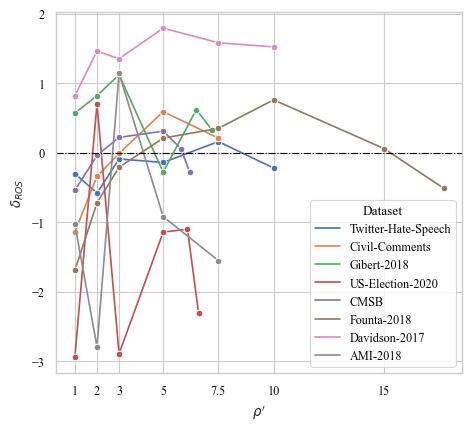

In [12]:
rho_name = "sampling_modifiedRS_rho"
data_clear_ros = ["founta-2018-thas"]
which_data_to_check = ((df_all_mean_results["variant"].isin(["baseline", "sampling_modifiedRS_oversampling"])) 
                        # & ~(df_all_mean_results["data_name"].isin(data_clear_ros))
                        )
df_ros = df_all_mean_results[which_data_to_check][["data_name", rho_name, "val_f1_macro"]]
def compute_deviation_to_baseline(row, split):
    baseline_condition = (df_ros["data_name"] == row["data_name"]) & (df_ros[rho_name] == "-")
    baseline_value = df_ros.loc[baseline_condition, f"{split}_f1_macro"].values[0]
    return row[f"{split}_f1_macro"] - baseline_value
df_ros["val_f1_macro_delta"] = df_ros.apply(lambda row: compute_deviation_to_baseline(row, "val"), axis=1)
df_ros = df_ros[df_ros[rho_name] != "-"]
df_ros = df_ros[[rho_name, "data_name", "val_f1_macro_delta"]]
df_ros = df_ros.rename({"data_name":"Dataset"}, axis=1)
df_ros["Dataset"] = df_ros['Dataset'].map(data_name_orig2display)
rhos_unique = df_ros.sampling_modifiedRS_rho.unique().tolist()

fig, ax = plt.subplots(figsize=(5,4.6)) # 
sns.lineplot(x="sampling_modifiedRS_rho", y="val_f1_macro_delta", data=df_ros, 
                hue="Dataset", marker="o", ax=ax)#
rho_ticks = [1,2,3,5,7.5,10,15]
ax.set_xticks(rho_ticks, labels=rho_ticks)
ax.set_xlabel(r"$\rho^{\prime}$")
ax.set_ylabel(r"$\delta_{ROS}$")
ax.axhline(y=0, linewidth=0.8, color="black", ls="-.")
ax.figure.tight_layout()
ax.figure.savefig('ROS_trend.svg', dpi=600, bbox_inches="tight")

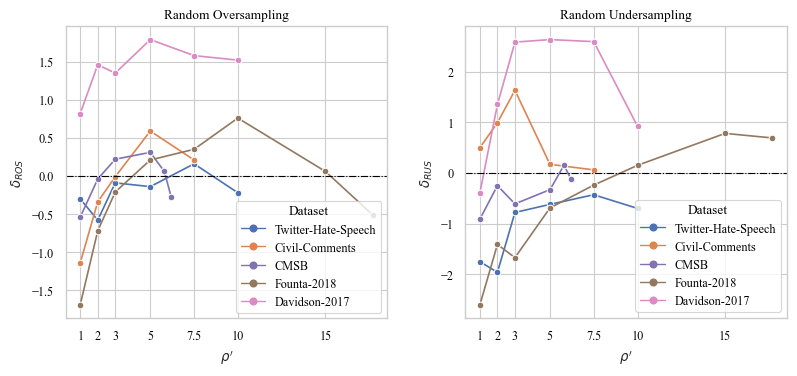

In [163]:
rho_name = "sampling_modifiedRS_rho"
data_noclear_rs = ["gibert-2018-shs", "us-election-2020", "ami"]
which_data_to_check = ((df_all_mean_results["variant"].isin(["sampling_modifiedRS_oversampling", "sampling_modifiedRS_undersampling"])) 
                       & ~(df_all_mean_results["data_name"].isin(data_noclear_rs))
                       )
df_ros_rus = df_all_mean_results[which_data_to_check][["data_name", "variant", rho_name, "val_f1_macro"]]
def compute_deviation_to_baseline(row, split):
    baseline_condition = (df_all_mean_results["data_name"] == row["data_name"]) & (df_all_mean_results["variant"] == "baseline")
    baseline_value = df_all_mean_results.loc[baseline_condition, f"{split}_f1_macro"].values[0]
    return row[f"{split}_f1_macro"] - baseline_value
df_ros_rus["val_f1_macro_delta"] = df_ros_rus.apply(lambda row: compute_deviation_to_baseline(row, "val"), axis=1)
df_ros_rus = df_ros_rus[[rho_name, "variant", "data_name", "val_f1_macro_delta"]]
df_ros_rus = df_ros_rus.rename({"data_name":"Dataset"}, axis=1)
df_ros_rus["Dataset"] = df_ros_rus['Dataset'].map(data_name_orig2display)

rc = {
    # 'figure.figsize':(5,4),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'text.color': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'font.family':'Times New Roman',
      'font.size' : 21}
plt.rcParams.update(rc)
g = sns.FacetGrid(df_ros_rus, col="variant", hue="Dataset", sharey=False, height=4.2, aspect=1, legend_out=False, palette=data2color)
g.map(sns.lineplot, "sampling_modifiedRS_rho", "val_f1_macro_delta", marker="o")
# g.add_legend()
rho_ticks = [1,2,3,5,7.5,10,15]
axs = list(g.axes_dict.values())
axs[0].set_title('Random Oversampling')
axs[0].set_ylabel(r"$\delta_{ROS}$")
# axs[0].set_yticks([-3,-2,-1,0,1,2], labels=[-3,-2,-1,0,1,2])
axs[1].set_title('Random Undersampling')
axs[1].set_ylabel(r"$\delta_{RUS}$")

from matplotlib.lines import Line2D
custom_lines = [
                Line2D([0], [0], color=sns.color_palette()[0], lw=1, linestyle="solid", marker="o", label="Twitter-Hate-Speech"),
                Line2D([0], [0], color=sns.color_palette()[1], lw=1, linestyle="solid", marker="o", label="Civil-Comments"),
                Line2D([0], [0], color=sns.color_palette()[4], lw=1, linestyle="solid", marker="o", label="CMSB"),
                Line2D([0], [0], color=sns.color_palette()[5], lw=1, linestyle="solid", marker="o", label="Founta-2018"),
                Line2D([0], [0], color=sns.color_palette()[6], lw=1, linestyle="solid", marker="o", label="Davidson-2017"),
                ]
axs[0].legend(handles=custom_lines, title="Dataset", loc="center right", bbox_to_anchor=(1, 0.21))#
custom_lines = [
                Line2D([0], [0], color=sns.color_palette()[0], lw=1, linestyle="solid", marker="o", label="Twitter-Hate-Speech"),
                Line2D([0], [0], color=sns.color_palette()[1], lw=1, linestyle="solid", marker="o", label="Civil-Comments"),
                Line2D([0], [0], color=sns.color_palette()[4], lw=1, linestyle="solid", marker="o", label="CMSB"),
                Line2D([0], [0], color=sns.color_palette()[5], lw=1, linestyle="solid", marker="o", label="Founta-2018"),
                Line2D([0], [0], color=sns.color_palette()[6], lw=1, linestyle="solid", marker="o", label="Davidson-2017"),
                ]
axs[1].legend(handles=custom_lines, title="Dataset", loc="lower right", bbox_to_anchor=(1, 0.))#
# rus_yticks = list(range(-10, 2, 2))
# axs[1].set_yticks(rus_yticks, labels=rus_yticks)
for ax in axs:
    ax.set_xticks(rho_ticks, labels=rho_ticks)
    ax.set_xlabel(r"$\rho^{\prime}$")
    ax.axhline(y=0, linewidth=0.8, color="black", ls="-.")
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
# sns.move_legend(g, loc='lower left', bbox_to_anchor=(0.3, 0.19))
g.figure.tight_layout()
g.figure.savefig('ROS_RUS_trend.svg', dpi=600)

## Random Undersampling

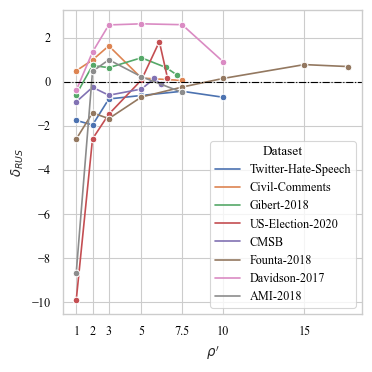

In [48]:
data_noclear_lossinfo_imbalance = ["founta-2018-thas"]
which_data_to_check = ((df_all_mean_results["variant"].isin(["baseline", "sampling_modifiedRS_undersampling"]))
                        # & (~df_all_mean_results["data_name"].isin(data_noclear_lossinfo_imbalance))
                        )
df_rus = df_all_mean_results[which_data_to_check][["data_name", "sampling_modifiedRS_rho", "val_f1_macro"]]
def compute_deviation_to_baseline(row, split):
    baseline_condition = (df_rus["data_name"] == row["data_name"]) & (df_rus["sampling_modifiedRS_rho"] == "-")
    baseline_value = df_rus.loc[baseline_condition, f"{split}_f1_macro"].values[0]
    return row[f"{split}_f1_macro"] - baseline_value
df_rus["val_f1_macro_delta"] = df_rus.apply(lambda row: compute_deviation_to_baseline(row, "val"), axis=1)
df_rus = df_rus[df_rus["sampling_modifiedRS_rho"] != "-"]
df_rus = df_rus[["sampling_modifiedRS_rho", "data_name", "val_f1_macro_delta"]]
df_rus = df_rus.rename({"data_name":"Dataset"}, axis=1)
df_rus["Dataset"] = df_rus['Dataset'].map(data_name_orig2display)
rhos_unique = df_rus.sampling_modifiedRS_rho.unique().tolist()

fig, ax = plt.subplots(figsize=(4,4))
sns.lineplot(x="sampling_modifiedRS_rho", y="val_f1_macro_delta", data=df_rus, 
                hue="Dataset", marker="o", ax=ax)#
rho_ticks = [1,2,3,5,7.5,10,15]
ax.set_xticks(rho_ticks, labels=rho_ticks)
ax.set_xlabel(r"$\rho^{\prime}$")
ax.set_ylabel(r"$\delta_{RUS}$")
ax.axhline(y=0, linewidth=0.8, color="black", ls="-.")
ax.figure.tight_layout()
ax.figure.savefig('RUS_trend.svg', dpi=600, bbox_inches="tight")

## Combi RS

/mounts/Users/cisintern/zhangyaq/anaconda3/envs/pl_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mounts/Users/cisintern/zhangyaq/anaconda3/envs/pl_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


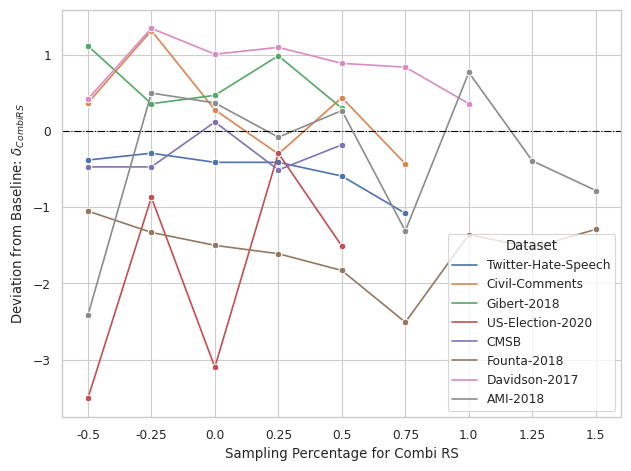

In [36]:
# data_noclear_lossinfo_imbalance = ["founta-2018-thas"]
which_data_to_check = ((df_all_mean_results["variant"].isin(["baseline", "sampling_weightedRS_combi"]))
                        # & (~df_all_mean_results["data_name"].isin(data_noclear_lossinfo_imbalance))
                        )
rho_name = "sampling_weightedRS_percentage"
df_rus = df_all_mean_results[which_data_to_check][["data_name", rho_name, "val_f1_macro"]]
def compute_deviation_to_baseline(row, split):
    baseline_condition = (df_rus["data_name"] == row["data_name"]) & (df_rus[rho_name] == "-")
    baseline_value = df_rus.loc[baseline_condition, f"{split}_f1_macro"].values[0]
    return row[f"{split}_f1_macro"] - baseline_value
df_rus["val_f1_macro_delta"] = df_rus.apply(lambda row: compute_deviation_to_baseline(row, "val"), axis=1)
df_rus = df_rus[df_rus[rho_name] != "-"]
df_rus = df_rus[[rho_name, "data_name", "val_f1_macro", "val_f1_macro_delta"]]
df_rus = df_rus.rename({"data_name":"Dataset"}, axis=1)
df_rus["Dataset"] = df_rus['Dataset'].map(data_name_orig2display)
rhos_unique = df_rus[rho_name].unique().tolist()

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()#figsize=(4.3,4.4)
sns.lineplot(x=rho_name, y="val_f1_macro_delta", data=df_rus, 
                hue="Dataset", marker="o", ax=ax)#
rho_ticks = rhos_unique
ax.set_xticks(rho_ticks, labels=rho_ticks)
ax.set_xlabel(r"Sampling Percentage for Combi RS")
# delta_ticks = [y for y in list(range(-2, 8, 2))]
# ax.set_yticks(delta_ticks)
ax.set_ylabel(r"Deviation from Baseline: $\delta_{Combi RS}$")
# '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
ax.axhline(y=0, linewidth=0.8, color="black", ls="-.")
ax.figure.tight_layout()
ax.figure.savefig('results/Combi-RS_trend.svg', dpi=600, bbox_inches="tight")

## Compare ROS, Augmentation

In [139]:
variant_to_check = ["baseline", "sampling_modifiedRS_oversampling", "augmentation_bert", "augmentation_abusive_lexicon", "augmentation_external_data"]
which_data_to_check = (df_all_agg_results["variant"].isin(variant_to_check))
metrics_to_check = ["test_f1_macro", "test_f1_per_label_0", "test_f1_per_label_1", "test_f1_per_label_2", "test_f1_per_label_3", "test_f1_per_label_4"]
df_mean_ros_aug = df_all_agg_results[which_data_to_check][["data_name", "variant", ] + metrics_to_check]
df_mean_ros_aug

,data_name,variant,test_f1_macro,test_f1_per_label_0,test_f1_per_label_1,test_f1_per_label_2,test_f1_per_label_3,test_f1_per_label_4
4,ami,augmentation_bert,54.62,66.38,82.02,42.11,55.01,27.60
5,ami,baseline,54.65,66.18,85.77,43.97,53.59,23.75
8,ami,augmentation_abusive_lexicon,55.61,66.66,85.02,44.88,55.60,25.88
9,ami,sampling_modifiedRS_oversampling,55.70,65.73,84.46,45.08,55.18,28.04
17,civil-comments,augmentation_abusive_lexicon,75.67,95.84,55.50,0.00,0.00,0.00
18,civil-comments,sampling_modifiedRS_oversampling,75.85,96.28,55.42,0.00,0.00,0.00
19,civil-comments,augmentation_bert,75.88,96.08,55.68,0.00,0.00,0.00
20,civil-comments,baseline,75.99,95.94,56.04,0.00,0.00,0.00
21,civil-comments,augmentation_external_data,76.44,96.41,56.48,0.00,0.00,0.00
24,cmsb-tsd,baseline,84.36,95.74,72.98,0.00,0.00,0.00


In [140]:
df_mean_ros_aug_by_data = pd.DataFrame(columns=["variant"] + sum([[f"{data_name}_{metric}" for metric in metrics_to_check] for data_name in data_names], []))
df_mean_ros_aug_by_data["variant"] = variant_to_check
for data_name in data_names:
    for variant in variant_to_check:
        conditions = (df_mean_ros_aug["data_name"] == data_name) & (df_mean_ros_aug["variant"] == variant)
        if len(df_mean_ros_aug[conditions]) > 0:
            value = df_mean_ros_aug.loc[conditions, "test_f1_macro"].values[0]
            df_mean_ros_aug_by_data.loc[df_mean_ros_aug_by_data["variant"] == variant, f"{data_name}_test_f1_macro"] = value
            for i in range(5):
                value = df_mean_ros_aug.loc[conditions, f"test_f1_per_label_{i}"].values[0]
                df_mean_ros_aug_by_data.loc[df_mean_ros_aug_by_data["variant"] == variant, f"{data_name}_test_f1_per_label_{i}"] = value
df_mean_ros_aug_by_data.to_csv("compare_ROS_augmentation.csv", index=False)

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


### Weighted Cross Entropy

In [56]:
conditions = (df_all_mean_results["variant"] == "wce") & (df_all_mean_results["num_classes"] == 2)
df_mean_wce = df_all_mean_results[conditions][["data_name", "wce_alpha", "val_f1_macro", "val_f1_per_label_0", "val_f1_per_label_1"]]
def compute_deviation_to_baseline(row):
    baseline_condition = (df_all_mean_results["data_name"] == row["data_name"]) & (df_all_mean_results["variant"] == "baseline")
    baseline_value = df_all_mean_results.loc[baseline_condition, "val_f1_per_label_1"].values[0]
    return row['val_f1_per_label_1'] - baseline_value
df_mean_wce["pos_f1_delta"] = df_mean_wce.apply(lambda row: compute_deviation_to_baseline(row), axis=1)
df_mean_wce["data_name"] = df_mean_wce["data_name"].map(data_name_orig2display)
df_mean_wce

,data_name,wce_alpha,val_f1_macro,val_f1_per_label_0,val_f1_per_label_1,pos_f1_delta
62,Twitter-Hate-Speech,0.1,86.94,98.37,75.51,-2.36
63,Twitter-Hate-Speech,0.25,87.21,98.31,76.10,-1.77
64,Twitter-Hate-Speech,0.75,87.60,98.33,76.88,-0.99
65,Twitter-Hate-Speech,0.9,87.48,98.31,76.65,-1.22
66,Twitter-Hate-Speech,0.93,87.42,98.25,76.59,-1.28
67,Twitter-Hate-Speech,0.99,82.73,97.02,68.44,-9.43
167,Civil-Comments,0.1,76.09,96.73,55.45,-4.36
168,Civil-Comments,0.25,77.49,96.98,58.00,-1.81
169,Civil-Comments,0.75,79.66,96.93,62.39,2.58
170,Civil-Comments,0.9,79.22,96.58,61.85,2.04


In [30]:
conditions = (df_all_mean_results["variant"] == "wce") & (df_all_mean_results["num_classes"] > 2)
df_mean_wce_multi = df_all_mean_results[conditions][["data_name", "wce_alpha", "val_f1_macro", 'val_f1_per_label_0', 'val_f1_per_label_1', 'val_f1_per_label_2', 'val_f1_per_label_3', 'val_f1_per_label_4']]
df_mean_wce_multi["data_name"] = df_mean_wce_multi["data_name"].map(data_name_orig2display)
df_mean_wce_multi

,data_name,wce_alpha,val_f1_macro,val_f1_per_label_0,val_f1_per_label_1,val_f1_per_label_2,val_f1_per_label_3,val_f1_per_label_4
571,Founta-2018,"(0.1, 0.2, 0.4, 1.0)",63.22,84.11,57.49,76.34,34.94,0.00
572,Founta-2018,"(0.1, 0.7, 0.9, 0.1)",59.68,82.47,52.86,77.17,26.21,0.00
573,Founta-2018,"(0.5, 0.6, 0.1, 0.6)",61.85,85.94,53.71,72.09,35.66,0.00
574,Founta-2018,"(0.5, 0.6, 0.2, 0.4)",62.64,86.14,54.45,76.97,33.01,0.00
575,Founta-2018,"(0.9, 0.1, 0.3, 0.7)",58.33,87.40,40.78,74.76,30.38,0.00
665,Davidson-2017,"(0.1, 0.7, 0.9)",68.48,23.35,94.19,87.90,0.00,0.00
666,Davidson-2017,"(0.5, 0.6, 0.1)",74.08,41.61,94.01,86.62,0.00,0.00
667,Davidson-2017,"(0.9, 0.1, 0.3)",76.57,47.52,93.67,88.51,0.00,0.00
668,Davidson-2017,"(1.2, 0.1, 0.4)",75.85,46.08,93.58,87.89,0.00,0.00
748,AMI-2018,"(0.1, 0.1, 0.1, 0.2, 0.9)",50.91,77.75,39.27,32.63,53.13,51.74


In [59]:
# wce_alpha_unique = df_mean_wce.wce_alpha.unique().tolist()
wce_alpha_unique = [0.1, 0.25, 0.75, 0.878, 0.888, 0.9, 0.93, 0.99]
# data_name_unique = df_mean_wce.data_name.unique().tolist()
data_name_unique = [data_name_orig2display[data_name] for data_name in ["twitter-hate-speech-tsa", "gibert-2018-shs", "us-election-2020"]]
df_wce_delta_by_data = pd.DataFrame(columns=["wce_alpha"] + sum([[f"{data_name}_macro_f1", 
                                                                    f"{data_name}_f1_non-hate", 
                                                                    f"{data_name}_f1_hate"] for data_name in data_name_unique], []))
df_wce_delta_by_data["wce_alpha"] = wce_alpha_unique
for data_name in data_name_unique:
    for wce_alpha in wce_alpha_unique:
        conditions = (df_mean_wce["data_name"] == data_name) & (df_mean_wce["wce_alpha"] == wce_alpha)
        if len(df_mean_wce[conditions]) > 0:
            value = df_mean_wce.loc[conditions, "val_f1_macro"].values[0]
            df_wce_delta_by_data.loc[df_wce_delta_by_data["wce_alpha"] == wce_alpha, f"{data_name}_macro_f1"] = value
            value = df_mean_wce.loc[conditions, "val_f1_per_label_0"].values[0]
            df_wce_delta_by_data.loc[df_wce_delta_by_data["wce_alpha"] == wce_alpha, f"{data_name}_f1_non-hate"] = value
            value = df_mean_wce.loc[conditions, "val_f1_per_label_1"].values[0]
            df_wce_delta_by_data.loc[df_wce_delta_by_data["wce_alpha"] == wce_alpha, f"{data_name}_f1_hate"] = value
df_wce_delta_by_data = df_wce_delta_by_data.sort_values(by=['wce_alpha']).reset_index(drop=True)
df_wce_delta_by_data

,wce_alpha,Twitter-Hate-Speech_macro_f1,Twitter-Hate-Speech_f1_non-hate,Twitter-Hate-Speech_f1_hate,Gibert-2018_macro_f1,Gibert-2018_f1_non-hate,Gibert-2018_f1_hate,US-Election-2020_macro_f1,US-Election-2020_f1_non-hate,US-Election-2020_f1_hate
0,0.100,86.94,98.37,75.51,77.69,95.4,59.97,57.94,94.42,21.45
1,0.250,87.21,98.31,76.1,78.43,95.27,61.6,80.44,95.76,65.13
2,0.750,87.6,98.33,76.88,78.98,94.88,63.09,79.75,95.43,64.08
3,0.878,NaN,NaN,NaN,NaN,NaN,NaN,79.47,95.47,63.47
4,0.888,NaN,NaN,NaN,79.72,95.39,64.04,NaN,NaN,NaN
5,0.900,87.48,98.31,76.65,79.1,94.84,63.37,81.16,95.63,66.7
6,0.930,87.42,98.25,76.59,NaN,NaN,NaN,NaN,NaN,NaN
7,0.990,82.73,97.02,68.44,76.09,93.45,58.73,32.5,30.71,34.29


### Focal Loss

In [7]:
conditions = (df_all_mean_results["variant"] == "fl") & (df_all_mean_results["num_classes"] == 2)
df_mean_fl = df_all_mean_results[conditions][["data_name", "fl_gamma", "val_f1_macro", "val_f1_per_label_0", "val_f1_per_label_1"]]
df_mean_fl["data_name"] = df_mean_fl["data_name"].map(data_name_orig2display)

fl_gamma_unique = df_mean_fl.fl_gamma.unique().tolist()
data_name_unique = df_mean_fl.data_name.unique().tolist()
df_mean_fl_by_data = pd.DataFrame()
df_mean_fl_by_data["fl_gamma"] = fl_gamma_unique
for data_name in data_name_unique:
    for fl_gamma in fl_gamma_unique:
        conditions = (df_mean_fl["data_name"] == data_name) & (df_mean_fl["fl_gamma"] == fl_gamma)
        if len(df_mean_fl[conditions]) > 0:
            value = df_mean_fl.loc[conditions, "val_f1_macro"].values[0]
            df_mean_fl_by_data.loc[df_mean_fl_by_data["fl_gamma"] == fl_gamma, f"{data_name}_macro_f1"] = value
            value = df_mean_fl.loc[conditions, "val_f1_per_label_0"].values[0]
            df_mean_fl_by_data.loc[df_mean_fl_by_data["fl_gamma"] == fl_gamma, f"{data_name}_f1_non-hate"] = value
            value = df_mean_fl.loc[conditions, "val_f1_per_label_1"].values[0]
            df_mean_fl_by_data.loc[df_mean_fl_by_data["fl_gamma"] == fl_gamma, f"{data_name}_f1_hate"] = value
df_mean_fl_by_data = df_mean_fl_by_data.sort_values(by=['fl_gamma']).reset_index(drop=True)
df_mean_fl_by_data

,fl_gamma,Twitter-Hate-Speech_macro_f1,Twitter-Hate-Speech_f1_non-hate,Twitter-Hate-Speech_f1_hate,Civil-Comments_macro_f1,Civil-Comments_f1_non-hate,Civil-Comments_f1_hate,Gibert-2018_macro_f1,Gibert-2018_f1_non-hate,Gibert-2018_f1_hate,US-Election-2020_macro_f1,US-Election-2020_f1_non-hate,US-Election-2020_f1_hate,CMSB_macro_f1,CMSB_f1_non-hate,CMSB_f1_hate
0,0.1,88.10,98.40,77.81,78.74,96.77,60.70,79.31,95.60,63.02,81.92,95.56,68.28,84.96,95.73,74.19
1,0.2,87.86,98.36,77.35,78.80,96.69,60.91,79.70,95.39,64.02,81.60,96.08,67.11,85.31,95.73,74.88
2,0.5,88.21,98.45,77.97,79.42,96.90,61.94,79.53,95.55,63.51,80.13,95.77,64.49,85.23,95.90,74.56
3,1.0,87.72,98.38,77.06,77.43,96.71,58.15,78.71,95.47,61.96,80.78,95.08,66.48,84.74,95.58,73.90
4,2.0,87.58,98.28,76.88,78.46,97.03,59.90,79.29,95.18,63.40,77.01,95.57,58.46,84.98,95.50,74.46
5,5.0,87.70,98.32,77.09,78.93,97.18,60.68,79.32,95.01,63.62,78.14,95.01,61.27,84.83,95.59,74.06


In [9]:
conditions = (df_all_mean_results["variant"] == "fl") & (df_all_mean_results["data_name"] == "davidson-thon")
df_mean_fl = df_all_mean_results[conditions][["data_name", "fl_gamma", "val_f1_macro", "val_f1_per_label_0", "val_f1_per_label_1", "val_f1_per_label_2", "val_f1_per_label_3"]]
df_mean_fl["data_name"] = df_mean_fl["data_name"].map(data_name_orig2display)

fl_gamma_unique = df_mean_fl.fl_gamma.unique().tolist()
data_name_unique = df_mean_fl.data_name.unique().tolist()
df_mean_fl_by_data = pd.DataFrame()
df_mean_fl_by_data["fl_gamma"] = fl_gamma_unique
for data_name in data_name_unique:
    for fl_gamma in fl_gamma_unique:
        conditions = (df_mean_fl["data_name"] == data_name) & (df_mean_fl["fl_gamma"] == fl_gamma)
        if len(df_mean_fl[conditions]) > 0:
            value = df_mean_fl.loc[conditions, "val_f1_macro"].values[0]
            df_mean_fl_by_data.loc[df_mean_fl_by_data["fl_gamma"] == fl_gamma, f"{data_name}_macro_f1"] = value
            for i in range(3):
                value = df_mean_fl.loc[conditions, f"val_f1_per_label_{i}"].values[0]
                df_mean_fl_by_data.loc[df_mean_fl_by_data["fl_gamma"] == fl_gamma, f"{data_name}_f1_per_label_{i}"] = value
df_mean_fl_by_data = df_mean_fl_by_data.sort_values(by=['fl_gamma']).reset_index(drop=True)
df_mean_fl_by_data = df_mean_fl_by_data.rename({"data_name":"Dataset"}, axis=1)
df_mean_fl_by_data

,fl_gamma,Davidson-2017_macro_f1,Davidson-2017_f1_per_label_0,Davidson-2017_f1_per_label_1,Davidson-2017_f1_per_label_2
0,0.1,75.76,45.29,94.17,87.81
1,0.2,75.29,43.18,94.34,88.34
2,0.5,76.02,45.63,94.32,88.12
3,1.0,75.49,44.09,94.30,88.09
4,2.0,76.68,46.67,94.50,88.88
5,5.0,76.02,45.74,94.14,88.17


In [10]:
conditions = (df_all_mean_results["variant"] == "fl") & (df_all_mean_results["data_name"] == "founta-2018-thas")
df_mean_fl = df_all_mean_results[conditions][["data_name", "fl_gamma", "val_f1_macro", "val_f1_per_label_0", "val_f1_per_label_1", "val_f1_per_label_2", "val_f1_per_label_3"]]
df_mean_fl["data_name"] = df_mean_fl["data_name"].map(data_name_orig2display)

fl_gamma_unique = df_mean_fl.fl_gamma.unique().tolist()
data_name_unique = df_mean_fl.data_name.unique().tolist()
df_mean_fl_by_data = pd.DataFrame()
df_mean_fl_by_data["fl_gamma"] = fl_gamma_unique
for data_name in data_name_unique:
    for fl_gamma in fl_gamma_unique:
        conditions = (df_mean_fl["data_name"] == data_name) & (df_mean_fl["fl_gamma"] == fl_gamma)
        if len(df_mean_fl[conditions]) > 0:
            value = df_mean_fl.loc[conditions, "val_f1_macro"].values[0]
            df_mean_fl_by_data.loc[df_mean_fl_by_data["fl_gamma"] == fl_gamma, f"{data_name}_macro_f1"] = value
            for i in range(4):
                value = df_mean_fl.loc[conditions, f"val_f1_per_label_{i}"].values[0]
                df_mean_fl_by_data.loc[df_mean_fl_by_data["fl_gamma"] == fl_gamma, f"{data_name}_f1_per_label_{i}"] = value
df_mean_fl_by_data = df_mean_fl_by_data.sort_values(by=['fl_gamma']).reset_index(drop=True)
df_mean_fl_by_data = df_mean_fl_by_data.rename({"data_name":"Dataset"}, axis=1)
df_mean_fl_by_data

,fl_gamma,Founta-2018_macro_f1,Founta-2018_f1_per_label_0,Founta-2018_f1_per_label_1,Founta-2018_f1_per_label_2,Founta-2018_f1_per_label_3
0,0.1,62.30,86.55,52.49,76.89,33.27
1,0.2,62.46,86.22,54.31,77.37,31.95
2,0.5,62.45,86.98,53.22,77.90,31.70
3,1.0,61.99,86.65,54.80,76.77,29.75
4,2.0,62.28,86.54,53.85,76.73,32.00
5,5.0,61.79,84.84,54.97,75.51,31.84


In [11]:
conditions = (df_all_mean_results["variant"] == "fl") & (df_all_mean_results["data_name"] == "ami")
df_mean_fl = df_all_mean_results[conditions][["data_name", "fl_gamma", "val_f1_macro", "val_f1_per_label_0", "val_f1_per_label_1", "val_f1_per_label_2", "val_f1_per_label_3", "val_f1_per_label_4"]]
df_mean_fl["data_name"] = df_mean_fl["data_name"].map(data_name_orig2display)

fl_gamma_unique = df_mean_fl.fl_gamma.unique().tolist()
data_name_unique = df_mean_fl.data_name.unique().tolist()
df_mean_fl_by_data = pd.DataFrame()
df_mean_fl_by_data["fl_gamma"] = fl_gamma_unique
for data_name in data_name_unique:
    for fl_gamma in fl_gamma_unique:
        conditions = (df_mean_fl["data_name"] == data_name) & (df_mean_fl["fl_gamma"] == fl_gamma)
        if len(df_mean_fl[conditions]) > 0:
            value = df_mean_fl.loc[conditions, "val_f1_macro"].values[0]
            df_mean_fl_by_data.loc[df_mean_fl_by_data["fl_gamma"] == fl_gamma, f"{data_name}_macro_f1"] = value
            for i in range(5):
                value = df_mean_fl.loc[conditions, f"val_f1_per_label_{i}"].values[0]
                df_mean_fl_by_data.loc[df_mean_fl_by_data["fl_gamma"] == fl_gamma, f"{data_name}_f1_per_label_{i}"] = value
df_mean_fl_by_data = df_mean_fl_by_data.sort_values(by=['fl_gamma']).reset_index(drop=True)
df_mean_fl_by_data = df_mean_fl_by_data.rename({"data_name":"Dataset"}, axis=1)
df_mean_fl_by_data

,fl_gamma,AMI-2018_macro_f1,AMI-2018_f1_per_label_0,AMI-2018_f1_per_label_1,AMI-2018_f1_per_label_2,AMI-2018_f1_per_label_3,AMI-2018_f1_per_label_4
0,0.1,52.93,75.64,45.58,35.45,54.40,53.60
1,0.2,54.00,76.50,47.97,33.89,52.37,59.28
2,0.5,52.46,76.90,48.44,35.76,51.19,50.02
3,1.0,51.67,77.12,47.95,35.19,50.88,47.21
4,2.0,49.45,76.47,39.76,29.53,55.63,45.86
5,5.0,50.11,77.47,39.21,26.72,53.59,53.54


In [92]:
conditions = (df_all_mean_results["variant"] == "wfl") & (df_all_mean_results["num_classes"] == 2)
df_mean_wfl = df_all_mean_results[conditions][["data_name", "fl_gamma", "wce_alpha", "test_f1_macro"]]
df_mean_wfl["data_name"] = df_mean_wfl["data_name"].map(data_name_orig2display)

fl_gamma_unique = df_mean_wfl.fl_gamma.unique().tolist()
wce_alpha_unique = [0.1, 0.25, 0.75, 0.9, 0.99]
data_name_unique = df_mean_wfl.data_name.unique().tolist()
df_mean_wfl_by_data = pd.DataFrame()
df_mean_wfl_by_data["fl_gamma"] = fl_gamma_unique * len(wce_alpha_unique)
df_mean_wfl_by_data["wce_alpha"] = sum([[alpha] * len(fl_gamma_unique) for alpha in wce_alpha_unique], [])
for data_name in data_name_unique:
    for fl_gamma in fl_gamma_unique:
        for wce_alpha in wce_alpha_unique:
            value_is_from_where = (df_mean_wfl["data_name"] == data_name) & (df_mean_wfl["fl_gamma"] == fl_gamma) & (df_mean_wfl["wce_alpha"] == wce_alpha)
            if len(df_mean_wfl[value_is_from_where]) > 0:
                value = df_mean_wfl.loc[value_is_from_where, "test_f1_macro"].values[0]
                where_to_assign = (df_mean_wfl_by_data["fl_gamma"] == fl_gamma) & (df_mean_wfl_by_data["wce_alpha"] == wce_alpha)
                df_mean_wfl_by_data.loc[where_to_assign, f"{data_name}_macro_f1"] = value
df_mean_wfl_by_data = df_mean_wfl_by_data.sort_values(by=['fl_gamma', 'wce_alpha']).reset_index(drop=True)
df_mean_wfl_by_data

,fl_gamma,wce_alpha,Twitter-Hate-Speech_macro_f1,Gibert-2018_macro_f1,US-Election-2020_macro_f1,CMSB_macro_f1
0,0.1,0.10,86.49,74.17,63.41,83.11
1,0.1,0.25,87.39,75.60,76.24,84.47
2,0.1,0.75,86.45,76.78,74.74,84.93
3,0.1,0.90,86.78,76.65,75.69,84.23
4,0.1,0.99,78.33,75.36,NaN,79.66
5,0.2,0.10,87.44,74.70,47.41,84.76
6,0.2,0.25,87.05,76.40,73.39,84.40
7,0.2,0.75,86.96,76.42,76.71,84.68
8,0.2,0.90,87.09,76.83,79.77,84.47
9,0.2,0.99,79.79,74.55,NaN,80.44


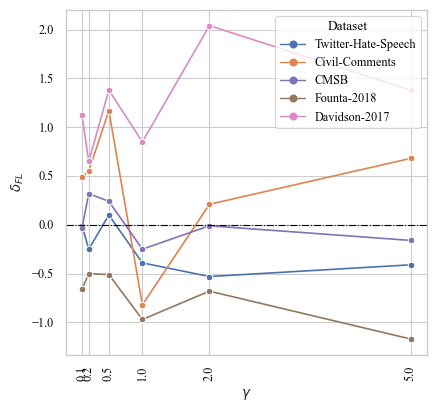

In [164]:
data_no_clear_fl = ["us-election-2020", "cmsb-tsd", "founta-2018-thas"]
which_data_to_check = (((df_all_mean_results["variant"] == "fl"))
                        & (~df_all_mean_results["data_name"].isin(data_noclear_rs))
                        )
df_mean_fl = df_all_mean_results[which_data_to_check][["data_name", "fl_gamma", "val_f1_macro"]]
def compute_deviation_to_baseline(row):
    baseline_condition = (df_all_mean_results["data_name"] == row["data_name"]) & (df_all_mean_results["variant"] == "baseline")
    baseline_value = df_all_mean_results.loc[baseline_condition, "val_f1_macro"].values[0]
    return row['val_f1_macro'] - baseline_value
df_mean_fl["val_f1_macro_delta"] = df_mean_fl.apply(lambda row: compute_deviation_to_baseline(row), axis=1)
df_mean_fl["data_name"] = df_mean_fl["data_name"].map(data_name_orig2display)
df_mean_fl = df_mean_fl.rename({"data_name":"Dataset"}, axis=1)

rc = {
    # 'figure.figsize':(5,4),
    #   'axes.facecolor':'white',
    #   'axes.grid' : True,
      'grid.color': '.8',
      'text.color': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'font.family':'Times New Roman',
      'font.size' : 21}
plt.rcParams.update(rc)
# sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(4.8,4.55))
sns.lineplot(x="fl_gamma", y="val_f1_macro_delta", data=df_mean_fl, hue="Dataset", marker="o", ax=ax, palette=data2color)
gamma_ticks = [0.1,0.2,0.5,1.0,2.0,5.0]
ax.set_xticks(gamma_ticks, labels=gamma_ticks, rotation=90)
ax.set_xlabel(r"$\gamma$")
# # delta_ticks = [y for y in list(range(-2, 8, 2))]
# # ax.set_yticks(delta_ticks)

custom_lines = [
                Line2D([0], [0], color=sns.color_palette()[0], lw=1, linestyle="solid", marker="o", label="Twitter-Hate-Speech"),
                Line2D([0], [0], color=sns.color_palette()[1], lw=1, linestyle="solid", marker="o", label="Civil-Comments"),
                Line2D([0], [0], color=sns.color_palette()[4], lw=1, linestyle="solid", marker="o", label="CMSB"),
                Line2D([0], [0], color=sns.color_palette()[5], lw=1, linestyle="solid", marker="o", label="Founta-2018"),
                Line2D([0], [0], color=sns.color_palette()[6], lw=1, linestyle="solid", marker="o", label="Davidson-2017"),
                ]
ax.legend(handles=custom_lines, title="Dataset", loc="best")#, bbox_to_anchor=(1, 1.)

ax.set_ylabel(r"$\delta_{FL}$")
# # '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
ax.axhline(y=0, linewidth=0.8, color="black", ls="-.")
# sns.move_legend(ax, "upper right", bbox_to_anchor=(.93, 1)) #
ax.figure.tight_layout()
ax.figure.savefig('FL_trend.svg', dpi=600, bbox_inches="tight")

#### Why are some data not good in FL?

In [24]:
# check if unpromising results in fl is because the negative class was improved
data_not_good_in_fl = ["us-election-2020", "waseem-and-hovy-2016"]
relevant_cols = ["data_name", "fl_gamma", "val_f1_macro", "test_f1_macro", 
                    "train_f1_per_label_0", "train_f1_per_label_1", 
                    "val_f1_per_label_0", "val_f1_per_label_1", 
                    "test_f1_per_label_0", "test_f1_per_label_1"]
which_row_to_check = (df_all_mean_results["variant"] == "fl") & (df_all_mean_results["data_name"].isin(data_not_good_in_fl))
df_all_mean_results[which_row_to_check][relevant_cols]

,data_name,fl_gamma,val_f1_macro,test_f1_macro,train_f1_per_label_0,train_f1_per_label_1,val_f1_per_label_0,val_f1_per_label_1,test_f1_per_label_0,test_f1_per_label_1
338,us-election-2020,0.1,81.92,74.44,99.82,98.72,95.56,68.28,94.48,54.40
339,us-election-2020,0.2,81.60,77.82,99.57,96.91,96.08,67.11,95.76,59.87
340,us-election-2020,0.5,80.13,72.89,99.66,97.57,95.77,64.49,95.11,50.67
341,us-election-2020,1.0,80.78,73.88,99.64,97.46,95.08,66.48,94.28,53.48
342,us-election-2020,2.0,77.01,74.45,99.20,94.01,95.57,58.46,95.79,53.10
343,us-election-2020,5.0,78.14,72.41,99.21,94.24,95.01,61.27,94.82,50.00
495,waseem-and-hovy-2016,0.1,86.53,86.77,99.41,98.36,92.94,80.11,93.22,80.32
496,waseem-and-hovy-2016,0.2,86.44,86.95,99.39,98.31,92.87,80.02,93.23,80.68
497,waseem-and-hovy-2016,0.5,86.16,86.50,99.33,98.16,92.46,79.85,92.75,80.25
498,waseem-and-hovy-2016,1.0,86.08,86.69,99.37,98.25,92.82,79.34,93.19,80.19


In [30]:
# check if unpromising results in fl is because the negative class was improved
data_good_in_fl = ["founta-2018-thas", "ami"]
relevant_cols = ["data_name", "fl_gamma", "val_f1_macro", "test_f1_macro", 
                    "train_f1_per_label_0", "train_f1_per_label_1", "train_f1_per_label_2", "train_f1_per_label_3", "train_f1_per_label_4",
                    "val_f1_per_label_0", "val_f1_per_label_1", "val_f1_per_label_2", "val_f1_per_label_3", "val_f1_per_label_4",
                    "test_f1_per_label_0", "test_f1_per_label_1", "test_f1_per_label_2", "test_f1_per_label_3", "test_f1_per_label_4"]
which_row_to_check = (df_all_mean_results["variant"] == "fl") & (df_all_mean_results["data_name"].isin(data_good_in_fl))
df_all_mean_results[which_row_to_check][relevant_cols]

,data_name,fl_gamma,val_f1_macro,test_f1_macro,train_f1_per_label_0,train_f1_per_label_1,train_f1_per_label_2,train_f1_per_label_3,train_f1_per_label_4,val_f1_per_label_0,val_f1_per_label_1,val_f1_per_label_2,val_f1_per_label_3,val_f1_per_label_4,test_f1_per_label_0,test_f1_per_label_1,test_f1_per_label_2,test_f1_per_label_3,test_f1_per_label_4
572,founta-2018-thas,0.1,62.30,62.92,98.47,94.16,96.66,91.46,0.00,86.55,52.49,76.89,33.27,0.00,86.39,52.00,78.56,34.73,0.00
573,founta-2018-thas,0.2,62.46,63.55,98.01,92.48,95.58,88.16,0.00,86.22,54.31,77.37,31.95,0.00,86.21,53.43,78.32,36.22,0.00
574,founta-2018-thas,0.5,62.45,62.91,97.77,91.49,95.39,87.83,0.00,86.98,53.22,77.90,31.70,0.00,86.91,52.85,78.85,33.02,0.00
575,founta-2018-thas,1.0,61.99,63.18,96.95,88.46,94.13,84.39,0.00,86.65,54.80,76.77,29.75,0.00,86.86,55.06,77.53,33.29,0.00
576,founta-2018-thas,2.0,62.28,62.93,97.24,89.33,95.27,88.20,0.00,86.54,53.85,76.73,32.00,0.00,86.54,53.50,77.19,34.47,0.00
577,founta-2018-thas,5.0,61.79,62.60,94.38,78.25,91.91,78.17,0.00,84.84,54.97,75.51,31.84,0.00,85.11,55.08,75.57,34.66,0.00
708,ami,0.1,52.93,54.25,99.56,97.64,95.85,98.99,97.56,75.64,45.58,35.45,54.40,53.60,65.13,85.09,45.69,52.34,23.02
709,ami,0.2,54.00,56.44,99.58,98.63,96.51,99.37,97.81,76.50,47.97,33.89,52.37,59.28,67.06,84.39,48.82,57.32,24.63
710,ami,0.5,52.46,54.92,99.72,99.25,98.64,99.50,100.00,76.90,48.44,35.76,51.19,50.02,65.48,85.64,46.06,55.99,21.42
711,ami,1.0,51.67,54.10,99.72,99.13,98.18,99.24,100.00,77.12,47.95,35.19,50.88,47.21,65.83,84.61,41.61,53.95,24.52


### Weighted Focal Loss

In [99]:
conditions = (df_all_mean_results["variant"] == "wfl")
df_mean_wfl = df_all_mean_results[conditions][["data_name", "wce_alpha", "fl_gamma", "val_f1_macro"]]
df_mean_wfl["data_name"] = df_mean_wfl["data_name"].map(data_name_orig2display)
df_mean_wfl

,data_name,wce_alpha,fl_gamma,test_f1_macro
70,Founta-2018,"(0.1, 0.2, 0.4, 1.0)",0.1,62.87
71,Founta-2018,"(0.1, 0.2, 0.4, 1.0)",0.2,63.24
72,Founta-2018,"(0.1, 0.2, 0.4, 1.0)",0.5,64.22
73,Founta-2018,"(0.1, 0.2, 0.4, 1.0)",1.0,63.14
74,Founta-2018,"(0.1, 0.2, 0.4, 1.0)",2.0,64.07
75,Founta-2018,"(0.1, 0.2, 0.4, 1.0)",5.0,62.32
76,Founta-2018,"(0.1, 0.7, 0.9, 0.1)",0.1,60.43
77,Founta-2018,"(0.1, 0.7, 0.9, 0.1)",0.2,59.90
78,Founta-2018,"(0.1, 0.7, 0.9, 0.1)",0.5,60.03
79,Founta-2018,"(0.1, 0.7, 0.9, 0.1)",1.0,57.76


### Augmentation

In [45]:
conditions = (df_all_mean_results["variant"] == "augmentation_bert")
# data_not_good_in_fl = ["us-election-2020", "waseem-and-hovy-2016"]
relevant_cols = ["data_name", "augmentation_rho", "augmentation_percentage", "augmentation_top_k", "val_f1_macro", "test_f1_macro", 
                    "train_f1_per_label_0", "train_f1_per_label_1", 
                    "val_f1_per_label_0", "val_f1_per_label_1", 
                    "test_f1_per_label_0", "test_f1_per_label_1"]
df_mean_aug_bert = df_all_mean_results[conditions][relevant_cols]
# df_mean_aug["data_name"] = df_mean_aug["data_name"].map(data_name_orig2display)
df_mean_aug_bert

,data_name,augmentation_rho,augmentation_percentage,augmentation_top_k,val_f1_macro,test_f1_macro,train_f1_per_label_0,train_f1_per_label_1,val_f1_per_label_0,val_f1_per_label_1,test_f1_per_label_0,test_f1_per_label_1
0,bretschneider-th-main,1.5,0.1,3,77.28,69.22,97.92,97.00,96.31,58.25,94.82,43.62
1,bretschneider-th-main,1.5,0.1,5,78.15,70.57,97.99,97.11,96.87,59.42,95.35,45.79
2,bretschneider-th-main,1.5,0.3,3,74.98,65.85,97.81,96.79,95.93,54.03,93.94,37.77
3,bretschneider-th-main,1.5,0.3,5,73.44,65.99,97.68,96.62,95.82,51.06,94.29,37.69
4,bretschneider-th-main,2.0,0.1,3,76.76,69.05,97.98,96.16,96.25,57.27,94.65,43.45
...,...,...,...,...,...,...,...,...,...,...,...,...
713,ami,1.5,0.3,5,52.00,51.71,99.43,99.77,76.90,44.16,65.26,84.02
714,ami,3.0,0.1,3,53.15,54.62,99.15,99.74,78.75,41.66,66.38,82.02
715,ami,3.0,0.1,5,51.48,55.38,99.30,99.34,77.20,42.07,65.98,83.82
716,ami,3.0,0.3,3,51.20,51.68,99.39,99.34,77.68,43.04,62.22,82.47


In [54]:
df_all_mean_results[df_all_mean_results["variant"].isin(["sampling_modifiedRS_oversampling", "augmentation_external_data"])]

,data_name,num_classes,data_type,size,rho,distribution,variant,sampling_modifiedRS_rho,sampling_weightedRS_percentage,augmentation_rho,...,test_f1_per_label_1,test_f1_per_label_2,test_f1_per_label_3,test_f1_per_label_4,test_accuracy,test_precision_macro,test_precision_weighted,test_recall_macro,test_recall_weighted,test_auprc
8,bretschneider-th-main,2,bin,2898,14.66,"{'0_neutral': 0.936, '1_harassment': 0.064}",augmentation_external_data,-,-,1.0,...,30.14,0.00,0.00,0.00,87.59,59.97,91.28,66.51,87.59,58.47
9,bretschneider-th-main,2,bin,2898,14.66,"{'0_neutral': 0.936, '1_harassment': 0.064}",augmentation_external_data,-,-,1.2,...,35.22,0.00,0.00,0.00,88.68,62.13,91.96,70.03,88.68,60.35
10,bretschneider-th-main,2,bin,2898,14.66,"{'0_neutral': 0.936, '1_harassment': 0.064}",augmentation_external_data,-,-,1.5,...,31.51,0.00,0.00,0.00,87.36,60.05,91.48,68.06,87.36,59.16
18,bretschneider-th-main,2,bin,2898,14.66,"{'0_neutral': 0.936, '1_harassment': 0.064}",sampling_modifiedRS_oversampling,1.0,-,-,...,49.94,0.00,0.00,0.00,92.41,70.18,93.72,77.06,92.41,67.06
19,bretschneider-th-main,2,bin,2898,14.66,"{'0_neutral': 0.936, '1_harassment': 0.064}",sampling_modifiedRS_oversampling,1.2,-,-,...,47.78,0.00,0.00,0.00,92.59,70.11,93.36,74.21,92.59,66.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,ami,5,multi,2245,11.21,"{'0_discredit': 0.514, '1_stereotype': 0.142, ...",sampling_modifiedRS_oversampling,1.5,-,-,...,86.69,42.01,49.83,25.82,64.13,59.05,68.73,55.57,64.13,56.60
728,ami,5,multi,2245,11.21,"{'0_discredit': 0.514, '1_stereotype': 0.142, ...",sampling_modifiedRS_oversampling,2.0,-,-,...,76.84,44.50,55.69,31.75,61.88,62.39,68.23,55.29,61.88,56.59
729,ami,5,multi,2245,11.21,"{'0_discredit': 0.514, '1_stereotype': 0.142, ...",sampling_modifiedRS_oversampling,3.0,-,-,...,84.46,45.08,55.18,28.04,65.07,58.58,67.51,57.03,65.07,57.98
730,ami,5,multi,2245,11.21,"{'0_discredit': 0.514, '1_stereotype': 0.142, ...",sampling_modifiedRS_oversampling,5.0,-,-,...,82.67,46.23,56.15,26.08,64.35,59.20,67.42,55.95,64.35,57.43


In [75]:
data_to_check = data_names[:-1]
conditions = (df_all_mean_results["variant"].isin(["sampling_modifiedRS_oversampling", "augmentation_external_data"]) 
                & df_all_mean_results["data_name"].isin(data_to_check))
relevant_cols = ["data_name", "variant", "sampling_modifiedRS_rho", "augmentation_rho", "val_f1_macro", "test_f1_macro", 
                    "train_f1_per_label_0", "train_f1_per_label_1", 
                    "val_f1_per_label_0", "val_f1_per_label_1", 
                    "test_f1_per_label_0", "test_f1_per_label_1"]
df_mean_aug_ext = df_all_mean_results[conditions][relevant_cols]
def get_rho(row):
    if row["sampling_modifiedRS_rho"] != "-":
        return row["sampling_modifiedRS_rho"]
    if row["augmentation_rho"] != "-":
        return row["augmentation_rho"]
df_mean_aug_ext["rho"] = df_mean_aug_ext.apply(lambda row: get_rho(row), axis=1)
df_mean_aug_ext["data_name"] = df_mean_aug_ext["data_name"].map(data_name_orig2display)
df_mean_aug_ext = df_mean_aug_ext[["data_name", "variant", "rho"] + relevant_cols[4:]]
df_mean_aug_ext = df_mean_aug_ext.sort_values(by=['data_name', 'rho']).reset_index(drop=True)
df_mean_aug_ext.to_csv("check_external_data.csv", index=False)